<h1 align="center">StudyForrest</h1> 
<h2 align="center"><em>An experiment in decentralized collaborative neuroimaging research</em></h2> 

<img src="favicon_edited.png" width="30%"></img>
<!-- <img src="run_forrest_edited.jpg" ></img> -->


## What is *StudyForrest*?

The *StudyForrest* project centers around the use of the movie Forrest Gump, which provides complex sensory input that is both reproducible and is also richly laden with real-life-like content and contexts. While study participants listened to and watched the movie, we collected a rich dataset that encompasses many hours of fMRI scans, structural brain scans, eye-tracking data, and extensive annotations of the movie.

Apart from these data acquisitions, several processed derivatives have also been generated and shared. These include functional contrasts, cortical and subcortical brain parcellations, retinotopic maps, and more.

The *StudyForrest* and all its derivatives are structured as a nested DataLad dataset that is accessible publicly and provides fine-grained data access down to the level of individual files.



## What is *DataLad*?

DataLad is a free and open-source distributed data management system, available for all major operating systems, that was developed to aid with everything related to the evolution of digital objects. As explained in the DataLad Handbook:

> *It is not only keeping track of code, it is not only keeping track of data, it is not only making sharing, retrieving and linking data (and metadata) easy, but it assists with the combination of all things necessary in the digital workflow of data and science.*




## Useful *StudyForrest* and *DataLad* links

- [StudyForrest website](https://www.studyforrest.org/)
- [StudyForrest data on GitHub](https://github.com/psychoinformatics-de/studyforrest-data)
- [datalad.org](https://www.datalad.org/)
- [DataLad Handbook](http://handbook.datalad.org/en/latest/index.html)
- ['Intro to DataLad' tutorial by Adina Wagner](https://www.youtube.com/watch?v=QsAqnP7TwyY&list=PLVso6Qs8PLCiMMBXewYQjsAQLVtzAdJJX&index=4)



## What is this notebook?

By following this interactive [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/), you are guided through the step-by-step process of accessing, downloading, and processing the *StudyForrest* data and its derivatives. This is made seamless with the use of DataLad and various other open source software packages, which are already installed in this Binder instance and ready to use.

#### Instructions:
- All code/Markdown cells can be run using the keyboard shortcut: `Shift + Enter` or `Shift + Return`
- It is important to run all of the cells in order from top to bottom. This is important because Jupyter Notebooks keep a global context, i.e. it remembers the results of the code that was recently executed, and takes that into account when running new code cells. For example, if you run a code cell to list the contents of a directory, then run a next cell to navigate to a different directory, then rerun the first cell, it will list the contents of the directory that you navigated to, not the one where you were originally located.
- If you get stuck or receive errors due to running the cells in a different order, you can restart the kernel in the `Kernel` menu option above.

#### Content:

1. [DataLad setup and introduction](#section1)
2. [StudyForrest dataset installation and structure](#section2)
3. [Retrieving and removing data](#section3)
4. [Visualizing structural data](#section4)
5. [Functional data quality plots](#section5)
6. [Your move :)](#section6)


\**Note: this notebook is not intended to be an in-depth tutorial on the use of DataLad. For a more detailed walk-through, please use the DataLad Handbook and introductory tutorial linked above. Some content of the current notebook was imported and adapted from the tutorial.*


---
---
---

<h1 align="center">Exploring the StudyForrest data</h1>

---

<a id="section1"></a>

## 1. DataLad setup and introduction

You can find more details about how to install DataLad and its dependencies on all operating systems in the DataLad handbook, in the [installation section](http://handbook.datalad.org/en/latest/intro/installation.html). It also details how to install DataLad on shared machines that you don’t have administrative privileges (sudo rights) on, such as high performance compute clusters.

Once installed, DataLad can be used as a command line tool or via its Python API. In the command line, an instruction always starts with the general `datalad` command:

In [1]:
!datalad

error: too few arguments
usage: datalad [-l LEVEL] [--pbs-runner {condor}] [-C PATH] [--version]
               [--dbg] [--idbg] [-c KEY=VALUE]
               [-f {default,json,json_pp,tailored,'<template>'}]
               [--report-status {success,failure,ok,notneeded,impossible,error}]
               [--report-type {dataset,file}]
               [--on-failure {ignore,continue,stop}] [--cmd]
               command [command-opts]


To find out more about the available commands, type `datalad --help`. If you already have DataLad installed, **make sure that it is a recent version, at least 0.12 or higher**:

In [2]:
!datalad --version

datalad 0.14.2


DataLad has further functionality that is particularly useful for getting local access to the dataset, its subdatasets, and individual files. These include:

```
datalad install  #install a top-level DataLad dataset with the option of recursively installing subdatasets
datalad clone    #install a single DataLad dataset
datalad get      #download a local copy of a file or files of an installed DataLad dataset
datalad drop     #remove a local copy of a file or files of an installed DataLad dataset
```

The use of these commands are illustrated below with the StudyForrest dataset.


---

<a id="section2"></a>

## 2. StudyForrest dataset installation and structure

Getting local access to the dataset is as simple as running the `install` command and pointing it to the location of the DataLad dataset (in this case: https://github.com/psychoinformatics-de/studyforrest-data):

In [5]:
!datalad install https://github.com/psychoinformatics-de/studyforrest-data

Clone attempt:   0%|              | 0.00/2.00 [00:00<?, ? Candidate locations/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0%|                                | 0.00/130 [00:00<?, ? Objects/s]
                                                                                
Compressing:   0%|                            | 0.00/70.0 [00:00<?, ? Objects/s]
                                                                                
Receiving:   0%|                               | 0.00/130 [00:00<?, ? Objects/s]
                                                                                
Resolving:   0%|                               | 0.00/62.0 [00:00<?, ? Deltas/s]
[INFO   ] Scanning for unlocked files (this may take some time)                 
[INFO   ] Remote origin not usable by git-annex; setting annex-ignore 
install(ok): /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data (dataset)


Once the dataset is installed, it exists as a light-weight directory on your local machine (in this case: `/studyforrest-data`). At this point, it contains only small metadata and information on the identity of the files in the dataset, but not actual content of the (sometimes large) data files. This fact can be verified by checking the disk usage in the relevant local directory:

In [6]:
cd studyforrest-data

/Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data


In [7]:
!du -sh 

220K	.


As you can see, the dataset size is tiny, and definitely not the size one would expect for a multi-modality neuroimaging dataset. However, the dataset is a complete representation of all data files. To explore this, the structure of the installed StudyForrest dataset can be viewed with the `tree` command:

In [8]:
!tree -d

.
├── artifact
│   ├── 3T_movie_eyetracking
│   ├── 3T_structural_mri
│   ├── 3T_visuallocalizer
│   ├── 7T_audiomovie
│   ├── 7T_musicperception
│   ├── media
│   └── movie_eyetracking
├── code
│   └── conversion_qa
├── derivative
│   ├── aggregate_fmri_timeseries
│   ├── aligned_mri
│   ├── cortical_surfaces_freesurfer
│   ├── image_space_transformations
│   ├── retinotopic_maps
│   └── visual_areas
├── original
│   ├── 3T_multiresolution_fmri
│   ├── 3T_structural_mri
│   ├── 7T_multiresolution_fmri
│   └── phase2
└── stimulus
    ├── computational_annotations
    └── curated_annotations

25 directories


There are subdirectories for the orignal data, derivative data, artifacts, stimuli, and code, all of which add to the rich StudyForrest dataset. In turn, the content of these subdirectories are structured as DataLad datasets themselves. This demonstrates the concept of dataset nesting, with the top-level (or super) dataset being the StudyForrest dataset that we just installed, and the subdatasets being all the subdirectories two levels down from the superdataset. These can be identified using the `subdatasets` command:

In [9]:
!datalad subdatasets

subdataset(ok): artifact/3T_movie_eyetracking (dataset)
subdataset(ok): artifact/3T_structural_mri (dataset)
subdataset(ok): artifact/3T_visuallocalizer (dataset)
subdataset(ok): artifact/7T_audiomovie (dataset)
subdataset(ok): artifact/7T_musicperception (dataset)
subdataset(ok): artifact/media (dataset)
subdataset(ok): artifact/movie_eyetracking (dataset)
subdataset(ok): code/conversion_qa (dataset)
subdataset(ok): derivative/aggregate_fmri_timeseries (dataset)
subdataset(ok): derivative/aligned_mri (dataset)
  [10 similar messages have been suppressed]
action summary:
  subdataset (ok: 20)


We see something unexpected, however, when navigating down to and listing the content of specific subdatasets. For example, the `original/phase2` subdataset:

In [10]:
cd original/phase2

/Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/phase2


In [11]:
ls

Note that the `ls` command does not, implying that there are no files or folders in the `phase2` directory. This is because our initial `datalad install https://github.com/psychoinformatics-de/studyforrest-data` command only installed the top-level dataset and referenced its subdatasets. It did not install the subdatasets. This behaviour will also occur with `clone` command. To install the content of sublevel datasets *as well*, the recursive flag should be added to the `install` command, as in:

```
datalad install -r https://github.com/psychoinformatics-de/studyforrest-data
```

Or the `get` command can also be used recursively to install subdatasets (while adding the `-n` flag prevents all data from being retrieved):

```
!datalad get --recursive -n https://github.com/psychoinformatics-de/studyforrest-data
```

Alternatively, the sublevel datasets can be installed individually:

In [12]:
!datalad install .

[INFO   ] Scanning for unlocked files (this may take some time)                 
[INFO   ] Fetching 'https://datapub.fz-juelich.de/studyforrest/studyforrest.ria/5ea/ff716-54eb-11e8-803d-a0369f7c647e/config' 
[INFO   ] Reconfigured inm7-storage for ria+https://datapub.fz-juelich.de/studyforrest/studyforrest.ria 
[INFO   ] Fetching 'https://datapub.fz-juelich.de/studyforrest/studyforrest.ria/5ea/ff716-54eb-11e8-803d-a0369f7c647e/config' 
[INFO   ] Configure additional publication dependency on "inm7-storage" 
install(ok): /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/phase2 (dataset) [Installed subdataset in order to get /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/phase2]


Now, after successful installation of the sublevel dataset, running the `ls` command should show the dataset content:

In [13]:
ls

CHANGES                            sub-23/
ISSUES                             sub-24/
LICENSE                            sub-25/
Makefile                           sub-26/
README.rst                         sub-27/
code/                              sub-28/
datacite.yml                       sub-29/
dataset_description.json           sub-30/
participants.tsv                   sub-31/
recording-cardresp_physio.json     sub-32/
recording-eyegaze_physio.json      sub-33/
src/                               sub-34/
stimuli/                           sub-35/
sub-01/                            sub-36/
sub-02/                            task-movie_bold.json
sub-03/                            task-movie_physio.json
sub-04/                            task-movielocalizer_bold.json
sub-05/                            task-movielocalizer_physio.json
sub-06/                            task-objectcategories_bold.json
sub-09/                            task-objectcategories_physio.json
sub-10/         

---

<a id="section3"></a>

## 3. Retrieving and dropping data

So we have installed a subdataset and we can inspect its contents, and now we want to work with the actual data in the files. Let's try and access the `participants.tsv` file:

In [14]:
from pathlib import Path
import pandas as pd

tsv_file = Path('participants.tsv')
try:
    tsv_abs_path = tsv_file.resolve(strict=True)
except FileNotFoundError:
    print('File does not exist')
else:
    print('File exists. Printing file contents.')
    participant_info = pd.read_csv(tsv_file, sep='\t')
    print(participant_info)

File exists. Printing file contents.
   participant_id gender    age handedness hearing_problems_current  \
0          sub-01      m  30-35          r                        n   
1          sub-02      m  35-40          r                        n   
2          sub-03      f  20-25          r                        n   
3          sub-04      f  20-25          r                        n   
4          sub-05      m  30-35          r                        n   
5          sub-06      m  20-25          r                        n   
6          sub-09      m  35-40          r                        n   
7          sub-10      f  20-25          r                        n   
8          sub-14      f  30-35          r                        n   
9          sub-15      m  25-30          r                        n   
10         sub-16      m  35-40          r                        n   
11         sub-17      m  30-35          r                        n   
12         sub-18      m  30-35         

Easy, right? Now let's try with a NIfTI file, for example the functional time series located at `sub-01/ses-movie/func/sub-01_ses-movie_task-movie_run-1_bold.nii.gz`:

In [15]:
from pathlib import Path
import nibabel as nib

nii_file = Path('sub-01/ses-movie/func/sub-01_ses-movie_task-movie_run-1_bold.nii.gz')
try:
    nii_abs_path = nii_file.resolve(strict=True)
except FileNotFoundError:
    print('File does not exist')
else:
    print('File exists. Printing file header content.')
    img = nib.load(nii_file)
    print(img.header)
    

File does not exist


As you can see, the returned message says 'File does not exist'. If we navigate to and list the contents of the subdirectory where this file is supposed to be located, we see the following:

In [16]:
cd sub-01/ses-movie/func/

/Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/phase2/sub-01/ses-movie/func


In [17]:
ls

sub-01_ses-movie_task-movie_run-1_bold.json@
sub-01_ses-movie_task-movie_run-1_bold.nii.gz@
sub-01_ses-movie_task-movie_run-1_defacemask.nii.gz@
sub-01_ses-movie_task-movie_run-1_events.tsv@
sub-01_ses-movie_task-movie_run-1_eyelinkraw.asc.gz@
sub-01_ses-movie_task-movie_run-1_recording-eyegaze_physio.tsv.gz@
sub-01_ses-movie_task-movie_run-2_bold.json@
sub-01_ses-movie_task-movie_run-2_bold.nii.gz@
sub-01_ses-movie_task-movie_run-2_defacemask.nii.gz@
sub-01_ses-movie_task-movie_run-2_events.tsv@
sub-01_ses-movie_task-movie_run-2_eyelinkraw.asc.gz@
sub-01_ses-movie_task-movie_run-2_recording-eyegaze_physio.tsv.gz@
sub-01_ses-movie_task-movie_run-3_bold.json@
sub-01_ses-movie_task-movie_run-3_bold.nii.gz@
sub-01_ses-movie_task-movie_run-3_defacemask.nii.gz@
sub-01_ses-movie_task-movie_run-3_events.tsv@
sub-01_ses-movie_task-movie_run-3_eyelinkraw.asc.gz@
sub-01_ses-movie_task-movie_run-3_recording-eyegaze_physio.tsv.gz@
sub-01_ses-movie_task-movie_run-4_bold.json@
sub-01_ses-movie_task-

In [18]:
cd ../../..

/Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/phase2


Thus, we can see that the file named `sub-01_ses-movie_task-movie_run-1_bold.nii.gz` is there, but in reality: what appears to be the file in the dataset is merely a symbolic link (or *symlink*, indicated by the `@` at the end of the filename) to the actual file stored elsewhere. This is intentional behaviour of DataLad (and its dependeny git-annex) and underlies the core functionality of having local access to a full representation of the dataset, while (often large) data files are stored elsewhere.

DataLad can be instructed to retrieve small text-based files upon dataset installation or cloning (technically, these are then stored and tracked with git and not with git-annex), which explains why the `tsv`-file was available and the `nii`-file not.

To retrieve a specific file or many files, we use the `datalad get` command:

In [19]:
!datalad get sub-01/ses-movie/func/sub-01_ses-movie_task-movie_run-1_bold.nii.gz

Total:   0%|                                   | 0.00/64.6M [00:00<?, ? Bytes/s]
Get sub-01/s .. _bold.nii.gz:   0%|            | 0.00/64.6M [00:00<?, ? Bytes/s]
Get sub-01/s .. _bold.nii.gz:  14%|▍  | 9.27M/64.6M [00:00<00:02, 18.6M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  28%|▊  | 18.0M/64.6M [00:01<00:02, 17.9M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  40%|█▏ | 26.1M/64.6M [00:01<00:02, 17.1M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  49%|█▍ | 31.9M/64.6M [00:02<00:02, 14.9M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  56%|█▋ | 36.5M/64.6M [00:02<00:02, 12.8M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  64%|█▉ | 41.2M/64.6M [00:03<00:02, 11.7M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  71%|██▏| 46.0M/64.6M [00:03<00:01, 10.9M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  79%|██▍| 51.2M/64.6M [00:04<00:01, 10.8M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  87%|██▌| 56.2M/64.6M [00:04<00:00, 10.5M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  95%|██▊| 61.6M/64.6M [00:05<00:00, 10.6M Bytes/s]
get(ok): sub-01/ses-movie/fu

Now, the same code to access the `nii`-file and print its header content should run without errors:

In [20]:
from pathlib import Path
import nibabel as nib

nii_file = Path('sub-01/ses-movie/func/sub-01_ses-movie_task-movie_run-1_bold.nii.gz')
try:
    nii_abs_path = nii_file.resolve(strict=True)
except FileNotFoundError:
    print('File does not exist')
else:
    print('File exists. Printing file header content.')
    img = nib.load(nii_file)
    print(img.header)

File exists. Printing file header content.
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  80  80  35 451   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         3.         3.         3.3000004  2.0000007  0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.011592761
quatern_c       : -0.9960713
quatern_d       : -0

Once data processing is completed and data are not required locally anymore, the content can be dropped from the dataset to save diskspace:

In [21]:
!datalad drop sub-01/ses-movie/func/sub-01_ses-movie_task-movie_run-1_bold.nii.gz

drop(ok): /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/phase2/sub-01/ses-movie/func/sub-01_ses-movie_task-movie_run-1_bold.nii.gz (file)


In [22]:
cd ../..

/Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data


---

<a id="section4"></a>

## 4. Visualizing structural data 

Now that we are familiar with the concepts of `install`, `clone`, `get` and `drop`, we can explore and visualize the StudyForrest dataset!

Let's view a structural T1w and T2w images of a single participant (located in the `original/3T_structural_mri`) subdataset.

First we'll install the dataset and get the relevant data:

In [23]:
!datalad install original/3T_structural_mri

[INFO   ] Scanning for unlocked files (this may take some time)                 
[INFO   ] Fetching 'https://datapub.fz-juelich.de/studyforrest/studyforrest.ria/188/2e2e6-fbbf-4ade-a65f-3a1615235f51/config' 
[INFO   ] Reconfigured inm7-storage for ria+https://datapub.fz-juelich.de/studyforrest/studyforrest.ria 
[INFO   ] Fetching 'https://datapub.fz-juelich.de/studyforrest/studyforrest.ria/188/2e2e6-fbbf-4ade-a65f-3a1615235f51/config' 
[INFO   ] Configure additional publication dependency on "inm7-storage" 
install(ok): /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/3T_structural_mri (dataset) [Installed subdataset in order to get /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/original/3T_structural_mri]


In [24]:
!datalad get original/3T_structural_mri/sub-01/anat/sub-01_T*w.nii.gz

Total:   0%|                                   | 0.00/27.8M [00:00<?, ? Bytes/s]
Get sub-01/a .. 1_T2w.nii.gz:   0%|            | 0.00/14.1M [00:00<?, ? Bytes/s]
Get sub-01/a .. 1_T2w.nii.gz:  64%|█▉ | 8.98M/14.1M [00:00<00:00, 17.9M Bytes/s]
Total:  51%|█████████████▏            | 14.1M/27.8M [00:01<00:01, 9.60M Bytes/s]
Get sub-01/a .. 1_T1w.nii.gz:   0%|            | 0.00/13.7M [00:00<?, ? Bytes/s]
Get sub-01/a .. 1_T1w.nii.gz:  75%|██▏| 10.3M/13.7M [00:00<00:00, 20.3M Bytes/s]
get(ok): original/3T_structural_mri/sub-01/anat/sub-01_T2w.nii.gz (file) [from mddatasrc...]
get(ok): original/3T_structural_mri/sub-01/anat/sub-01_T1w.nii.gz (file) [from mddatasrc...]
action summary:
  get (notneeded: 1, ok: 2)


Then we can plot the structural images in 3 dimensions. We can do this using a variety of Python tools. Here we use the functionality of `matplotlib` as an example:

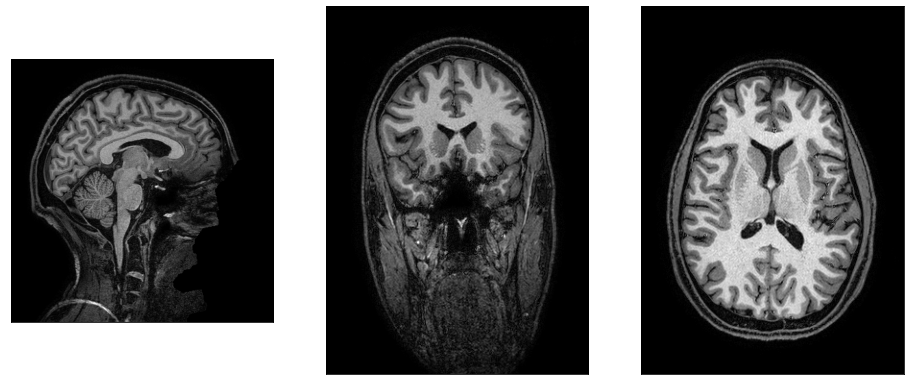

In [58]:
%matplotlib inline
from utilities import plot_structural
t1w_fn = os.path.abspath('original/3T_structural_mri/sub-01/anat/sub-01_T1w.nii.gz')
fig = plot_structural(t1w_fn)

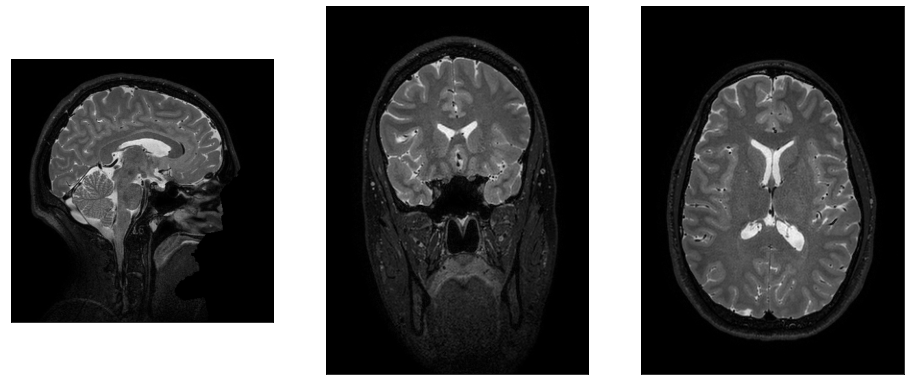

In [59]:
t1w_fn = os.path.abspath('original/3T_structural_mri/sub-01/anat/sub-01_T2w.nii.gz')
fig = plot_structural(t1w_fn)

---

<a id="section5"></a>

## 5. Functional data quality plots

Since head movement during the acquisition of a functional MRI time series can be detrimental for the eventual data analysis and results, volume-to-volume head movement parameters are typically inspected as a quality indicator of fMRI data. Framewise displacement (FD) captures head movement in a single value per volume, resulting in an FD time series per functional run. Below we present interactive distribution plots of FD values for all participants over all runs of the 3T audiovisual movie dataset. Distributions and an example time series are also presented for a single subject and a single run.

First, we install the subdataset and retrieve the relevant data:

In [27]:
!datalad install derivative/aligned_mri

[INFO   ] Scanning for unlocked files (this may take some time)                 
[INFO   ] Fetching 'https://datapub.fz-juelich.de/studyforrest/studyforrest.ria/c8e/c2919-493b-4af5-9271-cbe9ebd08c43/config' 
[INFO   ] Reconfigured inm7-storage for ria+https://datapub.fz-juelich.de/studyforrest/studyforrest.ria 
[INFO   ] Fetching 'https://datapub.fz-juelich.de/studyforrest/studyforrest.ria/c8e/c2919-493b-4af5-9271-cbe9ebd08c43/config' 
[INFO   ] Configure additional publication dependency on "inm7-storage" 
install(ok): /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/derivative/aligned_mri (dataset) [Installed subdataset in order to get /Users/jsheunis/Documents/psyinf/studyforrest-data-binder/studyforrest-data/derivative/aligned_mri]


In [28]:
!datalad get derivative/aligned_mri/sub-*/in_bold3Tp2/*_mcparams.txt

get(ok): derivative/aligned_mri/sub-09/in_bold3Tp2/sub-09_task-avmovie_run-1_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivative/aligned_mri/sub-02/in_bold3Tp2/sub-02_task-avmovie_run-4_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivative/aligned_mri/sub-06/in_bold3Tp2/sub-06_task-avmovie_run-7_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivative/aligned_mri/sub-14/in_bold3Tp2/sub-14_task-movielocalizer_run-1_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivative/aligned_mri/sub-17/in_bold3Tp2/sub-17_task-avmovie_run-4_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivative/aligned_mri/sub-09/in_bold3Tp2/sub-09_task-avmovie_run-6_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivative/aligned_mri/sub-10/in_bold3Tp2/sub-10_task-avmovie_run-6_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivative/aligned_mri/sub-16/in_bold3Tp2/sub-16_task-avmovie_run-1_bold_mcparams.txt (file) [from mddatasrc...]
get(ok): derivati

Then we:

1. calculate framewise displacement from the movement parameter files,
2. prepare all calculated values by structuring them in Pandas dataframes and lists, and
3. use Plotly to create interactive graphs of framewise displacement over all subjects and runs.

In [54]:
import os
import utilities as util
from plotly.colors import sequential, n_colors, qualitative
import plotly.graph_objs as go

dataset_dir = os.path.abspath('derivative/aligned_mri')
participants, column_names, df_subs, df_subsruns = util.prepare_fd(dataset_dir)

colors = n_colors('rgb(255, 149, 81)', 'rgb(109, 52, 137)', 20, colortype='rgb')
data = []
layout = go.Layout(
    xaxis = dict(tickangle=45),
    yaxis = dict(title='Framewise displacement (mm)', range=[-0.3, 2]),
    title = 'Framewise displacement for all participants over all runs (audio-visual movie task)'
)
fig1 = go.Figure(layout=layout)
i = 0
for colname, color in zip(participants, colors):
    data.append(df_subs[colname].dropna().to_numpy())
    fig1.add_trace(go.Violin(y=data[i], line_color=colors[i], name=colname, orientation='v', side='positive', width=1.8, points=False, box_visible=True, meanline_visible=True))
    i += 1
fig1.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig1

In [55]:
sub_nr = 1
sub = f"sub-{sub_nr:02d}"

data = []
layout = go.Layout(
    title = 'Framewise displacement for all 8 runs of ' + sub + ' (audio-visual movie task)',
    xaxis = dict(tickangle=45),
    yaxis = dict(title='Framewise displacement (mm)', range=[-0.05, 1]),
    height=400,
)
fig2 = go.Figure(layout=layout)
i = 0
for colname, color in zip(column_names[8*(sub_nr-1):8*sub_nr], colors):
    data.append(df_subsruns[colname].dropna().to_numpy())
    fig2.add_trace(go.Violin(y=data[i], line_color=sequential.Viridis[i], name=colname, orientation='v', side='positive', width=1.8, points=False, box_visible=True, meanline_visible=True))
    i += 1
fig2.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig2

In [56]:
from plotly.subplots import make_subplots

run_nr = 2
run = f"run-{run_nr}"
marker = sub + '_' + run

fig3 = make_subplots(rows=1, cols=2, column_widths=[0.85, 0.15],shared_yaxes=True, subplot_titles=("Time series", "Distribution"), horizontal_spacing=0.01)
fig3.add_trace(go.Scatter(y=df_subsruns[marker].dropna().to_numpy(), mode='lines', line = dict(color=sequential.Viridis[run_nr-1], width=2), name='Time series', showlegend=False),
              row=1, col=1)
fig3.add_trace(go.Violin(y=df_subsruns[marker].dropna().to_numpy(), line_color=sequential.Viridis[run_nr-1], name='Distribution', orientation='v', side='positive', width=1.5, points='all', jitter=0.5, box_visible=True, meanline_visible=True, showlegend=False),
              row=1, col=2)
fig3.update_layout(
    height=300,
    yaxis = dict(title='FD (mm)',range=[-0.05, 1]),
    title = 'Framewise displacement for sub-01-run2 (time series and distribution)'
)
fig3.update_xaxes(showticklabels=False)
fig3.update_xaxes(showticklabels=True, row=1, col=1)
fig3

---

<a id="section6"></a>

## 6. Your move :)

Thanks for following along! You have now experienced the basics of working with the StudyForrest data using DataLad. You have also seen some sample scripts and visualizations of the structural and functional data.

Now it's your turn :) Feel free to add more code cells below and test out your favorite algorithm/script/package on the StudyForrest data!

![ChessUrl](https://media.giphy.com/media/IgGLggVL4HXYDAot0Y/source.gif "forest_wave")